In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load dataset

df = pd.read_csv(r"C:\Users\mchep\OneDrive\Desktop\Projects\Employee-Attrition\Data\HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Analyse Class Balance

<Axes: xlabel='Attrition', ylabel='count'>

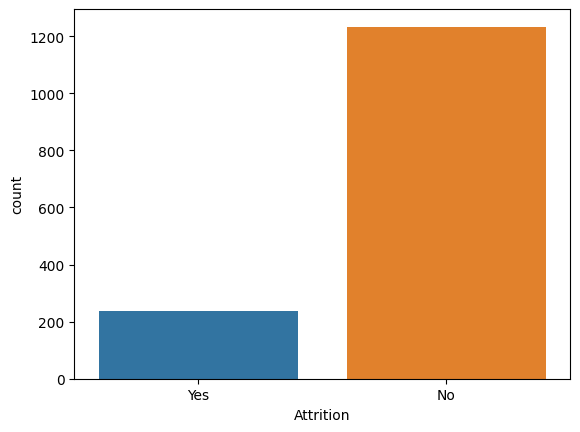

In [5]:
sns.countplot(x='Attrition', data=df)

### Clean Data

In [6]:
# Remove unnecessary features and class/target convert to integer
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)
        
df['Attrition'] = df.Attrition.astype("category").cat.codes

### Use Random Forest Classifier to Predict Attrition

In [7]:
# Train and test data separation
X = df.drop('Attrition', axis=1)
y = df.Attrition

# Perform label encoding on categorical variables
label_encoder = LabelEncoder()
X_encoded = X.copy()
for column in X.columns:
    if X[column].dtype == object:
        X_encoded[column] = label_encoder.fit_transform(X[column])

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Create a Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = random_forest.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8616780045351474


The accuracy of the Random Forest classifier on the test data is 0.8616780045351474, which means that the model is able to correctly classify approximately 86.17% of the instances in the test set. 

### Hyperparameter Tuning and Model Evaluation using Grid Search for Random Forest Classifier

In [8]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the testing data using the best model
y_pred = best_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.8616780045351474


The best hyperparameters are determined as follows:

'max_depth': None: This means that the decision trees in the Random Forest can grow without any maximum depth limitation, allowing them to expand until all leaves are pure or contain a minimum number of samples.
'min_samples_split': 5: This hyperparameter defines the minimum number of samples required to split an internal node in the decision trees. It ensures that further splits are only performed if a node has more than 5 samples.
'n_estimators': 100: This refers to the number of decision trees in the Random Forest ensemble. The best performance was achieved with 100 decision trees.

The accuracy value of 0.8616780045351474 indicates that the model correctly predicted approximately 86.17% of the instances in the test set.

These results are indicative of the optimised configuration that achieved the highest performance for the Random Forest classifier.

### Conclusion

Hyperparameter tuning is a critical step in machine learning that involves finding the optimal values for the hyperparameters of a model. It is important because it leads to improved model performance by maximising accuracy or other evaluation metrics. Tuning helps avoid overfitting or underfitting, making the model more robust and better able to generalize to unseen data. It also allows for efficient resource utilisation, customisation to specific problem domains, and continuous improvement of the model over time.